# ECH 60 Spring 2022: QUIZ 3

<font color='red'> Total 6+4.5+2=12.5 points </font>

Stop working on this quiz within 45 minutes of starting it. Rename this file as lastname_firstname and upload to canvas in the correct ipynb format within an hour of your section start time. Partial points will be awarded ONLY IF a reasonably accurate attempt has been made. 

You may consult your notes, lecture material, or tutorials. You must NOT consult any other sources. You should NOT seek help from anyone else for the duration of the quiz. And you should NOT share or discuss questions with other sections after your quiz. Any violation of these rules will be treated as academic misconduct, and  will be reported as such to the office of student support and judicial affairs.

Acknowledge abiding by these rules by writing a single line of code to print your name:

In [1]:
print("Devin Fan")

Devin Fan


**PROBLEM 0:** First, execute the following code cell to import modules and load functions we have developed in past lectures or tutorials.

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.optimize as so

# linfit(xdata,ydata) returns a,b such that ydata=a+b*xdata
def linfit(x,y):
    n=len(x)
    sx=sum(x)
    sy=sum(y)
    sxx=sum(x**2)
    sxy=sum(x*y)

    a=(sx*sxy-sy*sxx)/(sx**2-n*sxx)
    b=(sx*sy-n*sxy)/(sx**2-n*sxx)
    return a,b



# expfit(xdata,ydata) returns C,D such that ydata=C*exp(D*xdata)
def expfit(x,y):
    mod_y=np.log(y)
    a,b=linfit(x,mod_y)
    return np.exp(a),b




# Newton(function,derivative,initial guess,tolerance,maximum number of iterations) 
# returns root of the provided function
def Newton(f,fder,x_0,tol,max_iter):    
    x_est=x_0    
    for i in range(max_iter):
        x_est-=f(x_est)/fder(x_est) 
        
        if np.abs(f(x_est))<tol:
            break
    if i==max_iter-1: 
        print('No solution after %d iterations' %max_iter)
        return
    else:
        return x_est

**PROBLEM 1:**  <font color='red'> [Total 6 points] </font>



**1 (a):** With just one line of code, create a python function to represent the equation $ x^3 -2x - e^{x} = -2 $ in the form $f(x) =  \ldots$. 

<font color='green'> [0.5 point] </font>

In [7]:
def f(x): return x**3-2*x-np.exp(x)+2
f(1)

-1.718281828459045

**1 (b):**  With just one line of code, create a python function to represent the derivative of $f(x)$ from part (a) above. 

<font color='green'> [0.5 point] </font>

In [131]:
def f_der(x): return -np.exp(x)+3*x**2-2
f_der(2)

2.6109439010693496

**1 (c):** Plot $f(x)$. Choose the $x$ limits such that all crossings with the x-axis are clearly visible. 

<font color='green'> [1 point] </font>

In [42]:
x=np.linspace(2,100,20)
#plt.plot(f,x)

**1 (d):** Use Newton's method (use the function defined in the beginning) to find all roots up to 8 decimal points of tolerance using approximate initial guesses based on the plot above. Use one line of code for each root.

<font color='green'> [2 points] </font>

In [132]:
Newton(f,f_der,5,1e-8,100)
Newton(f,f_der,1,1e-8,100)

No solution after 100 iterations
No solution after 100 iterations


**1(e):** Use `fsolve` to find all roots in one shot: only one line of code necessary.

<font color='green'> [1 point] </font>

In [22]:
so.fsolve(f,(1,5))

array([1.43997643, 3.61843727])

**1(f):** Use `fsolve` to find the location of the maxima of $f(x)$ near $x=4$. 

<font color='green'> [1 point] </font>

In [27]:
so.fsolve(f_der,4)

array([3.61843727])

**PROBLEM 2:** <font color='red'> [Total 4.5 points] </font>



**2(a):** The oxidation rates of methane changes with temperature. Experiments show the following data:

$$\begin{matrix} {\rm temperature~(T)~in~Kelvin} & 595 & 623 & 761 & 849 & 989 & 1076 & 1146 & 1202 & 1382 & 1445 & 1562\\{\rm reaction~rate~(k)}& 2.12 &  3.12 & 14.4 & 30.6 & 80.3 & 131 & 186 & 240 & 489 & 604 & 868 \end{matrix}$$

Rate constants typically follow the Arrhenius equation: $k=Ae^{-B/T}$.  Using this information, plot the given data with the correct type of linear/log/reciprocal axis such that it looks like a straight line. Provide the correct axis labels. 

<font color='green'> [3 points] </font>

/var/folders/22/g0lkw7px703_ymv0l30dq4p80000gn/T/ipykernel_96296/3401774503.py:2: RuntimeWarning: overflow encountered in exp
  T1=np.exp(T)


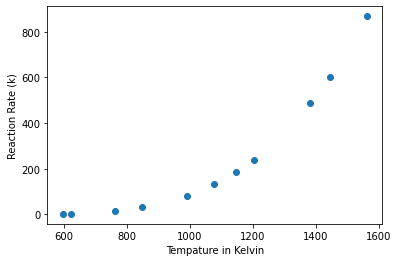

In [112]:
T=np.array([595,623,761,849,989,1076,1146,1202,1382,1445,1562])
T1=np.exp(T)
k=np.array([2.12,3.12,14.4,30.6,80.3,131,186,240,489,604,868])
x=np.linspace(100,20000,100)
plt.xlabel('Tempature in Kelvin')
plt.ylabel('Reaction Rate (k)')
plt.scatter(T,k)
plt.show()

**2(b):**  Fit this data set to find the Arrhenius constants $A$ and $B$. Use any fitting functions provided in the beginning.

<font color='green'> [1.5 points] </font>

In [115]:
linfit(T1,k)

/var/folders/22/g0lkw7px703_ymv0l30dq4p80000gn/T/ipykernel_96296/2624548432.py:11: RuntimeWarning: overflow encountered in square
  sxx=sum(x**2)
/var/folders/22/g0lkw7px703_ymv0l30dq4p80000gn/T/ipykernel_96296/2624548432.py:14: RuntimeWarning: invalid value encountered in double_scalars
  a=(sx*sxy-sy*sxx)/(sx**2-n*sxx)
/var/folders/22/g0lkw7px703_ymv0l30dq4p80000gn/T/ipykernel_96296/2624548432.py:15: RuntimeWarning: invalid value encountered in double_scalars
  b=(sx*sy-n*sxy)/(sx**2-n*sxx)


(nan, nan)

**PROBLEM 3:** <font color='red'> [Total 2 points] </font>

A model for the size $s$ of a tumor at time $t$ is 
## $$ s(t) = s_m e^{k e^{-rt}}$$
where $k=\ln (s_0/s_m)$ such that $s_0$ is the initial tumor size, $s_m$ is the maximum possible size, and $r$ is the rate of tumor growth. If $s_0=1$, $s_m=10$, and $r=0.05$, find the time when the tumor is five times as big as its initial size using `fsolve`.

In [3]:
so=1
sm=10
k=np.log(so/sm)
r=0.05
def s(t): return (sm*(np.exp(k*np.exp(-r*t))))-5
so.fsolve(s(t),5)

AttributeError: 'int' object has no attribute 'fsolve'

*Rough work/test cells (won't be graded):*